<a href="https://colab.research.google.com/github/Amishmali/HOTEL-BOOKING-ANALYSIS/blob/main/Amish_Mali_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***HOTEL  BOOKING  ANALYSIS***

In [ ]:
# Importing the libraries needed in the project.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
import plotly
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#csv file location
file_path= "/content/drive/MyDrive/datafiles/Hotel Bookings.csv"

In [ ]:
# Reading and viewing the csv file.
df = pd.read_csv('/content/drive/MyDrive/datafiles/Hotel Bookings.csv')

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Checking number of **data types** here.


In [ ]:
df.dtypes.value_counts()

int64      16
object     12
float64     4
dtype: int64

First of all, we are going to make a **copy** of **original dataset** so to avoid any kind of data losses

In [ ]:
# Creating a copy of dataframe

df1 = df.copy()
df1.shape

(119390, 32)

### Data Description:

1. **hotel** : *Hotel(Resort Hotel or City Hotel)*

2. **is_canceled** : *Value indicating if the booking was canceled (1) or not (0)*

3. **lead_time** :* Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

4. **arrival_date_year** : *Year of arrival date*

5. **arrival_date_month** : *Month of arrival date*

6. **arrival_date_week_number** : *Week number of year for arrival date*

7. **arrival_date_day_of_month** : *Day of arrival date*

8. **stays_in_weekend_nights** : *Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel*

9. **stays_in_week_nights** : *Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel*

10. **adults** : *Number of adults*

11. **children** : *Number of children*

12. **babies** : *Number of babies*

13. **meal** : *Type of meal booked. Categories are presented in standard hospitality meal packages:*

14. **country** : *Country of origin.`*

15. **market_segment** : *Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

16. **distribution_channel** : *Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

17. **is_repeated_guest** : *Value indicating if the booking name was from a repeated guest (1) or not (0)*

18. **previous_cancellations** : *Number of previous bookings that were cancelled by the customer prior to the current booking*

19. **previous_bookings_not_canceled** : *Number of previous bookings not cancelled by the customer prior to the current booking*

20. **reserved_room_type** : *Code of room type reserved. Code is presented instead of designation for anonymity reasons.*

21. **assigned_room_type** : *Code for the type of room assigned to the booking.*

22. **booking_changes** : *Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation*

23. **deposit_type** : *Indication on if the customer made a deposit to guarantee the booking.*

24. **agent** : *ID of the travel agency that made the booking*

25. **company** : *ID of the company/entity that made the booking or responsible for paying the booking.*

26. **days_in_waiting_list** : *Number of days the booking was in the waiting list before it was confirmed to the customer*

27. **customer_type** : *Type of booking, assuming one of four categories*


28. **adr** : *Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights*

29. **required_car_parking_spaces** : *Number of car parking spaces required by the customer*

30. **total_of_special_requests** :* Number of special requests made by the customer (e.g. twin bed or high floor)*

31. **reservation_status** : *Reservation last status, assuming one of three categories*
* Canceled – booking was canceled by the customer
* Check-Out – customer has checked in but already departed
* No-Show – customer did not check-in and did inform the hotel of the reason why





32. **reservation_status_date** : *Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel*

In [ ]:
# converting object type to datetime
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')
df1['reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

### <b> Cleaning data </b>

Cleaning data is crucial step before Data anlysis as it will remove the ambigous data that can affect our outcome.

While cleaning data we will perform following steps: \
1) Remove duplicate rows  \
2) Handling missing values.  \
3) Adding columns

### <b> Step 1: Removing duplicate rows if any </b>

In [ ]:
# checking for the duplicate rows
df1.duplicated().value_counts()

False    87396
True     31994
dtype: int64

So we have 31994 duplicate rows in our data. So we will drop the duplicate rows from our data

In [ ]:
#dropping the duplicate rows
df1= df1.drop_duplicates()

In [ ]:
# data set reduced
df1.shape

(87396, 32)

### <b> Step 2: Handling NULL values. </b>


In [ ]:
#checking for Null Values
df1.isna().sum().sort_values(ascending=False).reset_index().rename(columns={'index':'Column list',0:'total null'})

,Column list,total null
0,company,82137
1,agent,12193
2,country,452
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0
6,booking_changes,0
7,deposit_type,0
8,hotel,0
9,previous_cancellations,0


So we Have Null values in columns- Company, agent, Country,children.
1. for company and agent I will fill the Missing values with 0
2. for country I will fill Missing values with boject 'Others'. ( assuming while collecting data country was not found so user selected the 'Others' option.)
3. AS the count of missing values in Children Column is only 4, so we can replace with 0 considering no childrens.

In [ ]:

# Filling/replacing null values with 0.
null_columns=['agent','children','company']
for elem in null_columns:
  df1[elem].fillna(0,inplace=True)


# Replacing NA values with 'others'
df1['country'].fillna('others',inplace=True)


In [ ]:
df1['agent'].isnull().sum()
df1['children'].isnull().sum()
df1['company'].isnull().sum()
df1['country'].isnull().sum()


0

So now, we Have zero Null values in columns- Company, agent, Country,children.


In [ ]:
# droppping all those rows in which addtion of of adlults ,children and babies is 0. That simply means  no bookings were made.

df1.drop(df1[df1['adults']+df1['babies']+df1['children']==0].index,inplace=True)


# </b>Step 3: Adding Columns </b>

In [ ]:
# lets add some new columns

df1['total_people'] = df1['adults'] + df1['babies'] + df1['children']
df1['total_stay'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']


In [ ]:
# Checking the final rows and columns
df1.shape

(87230, 34)

# **Data Analysis**
\
Lets first find the **correlation**.
\
\
Since, columns like '**is_cancelled**', '**arrival_date_year**', '**arrival_date_week_number**', '**arrival_date_day_of_month**', '**is_repeated_guest**', '**company**', '**agent**' are categorical data having numerical type. So we don't need to check them for correlation.


In [ ]:
df_corr = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','adults','children', 'babies','stays_in_week_nights','stays_in_weekend_nights' ]]


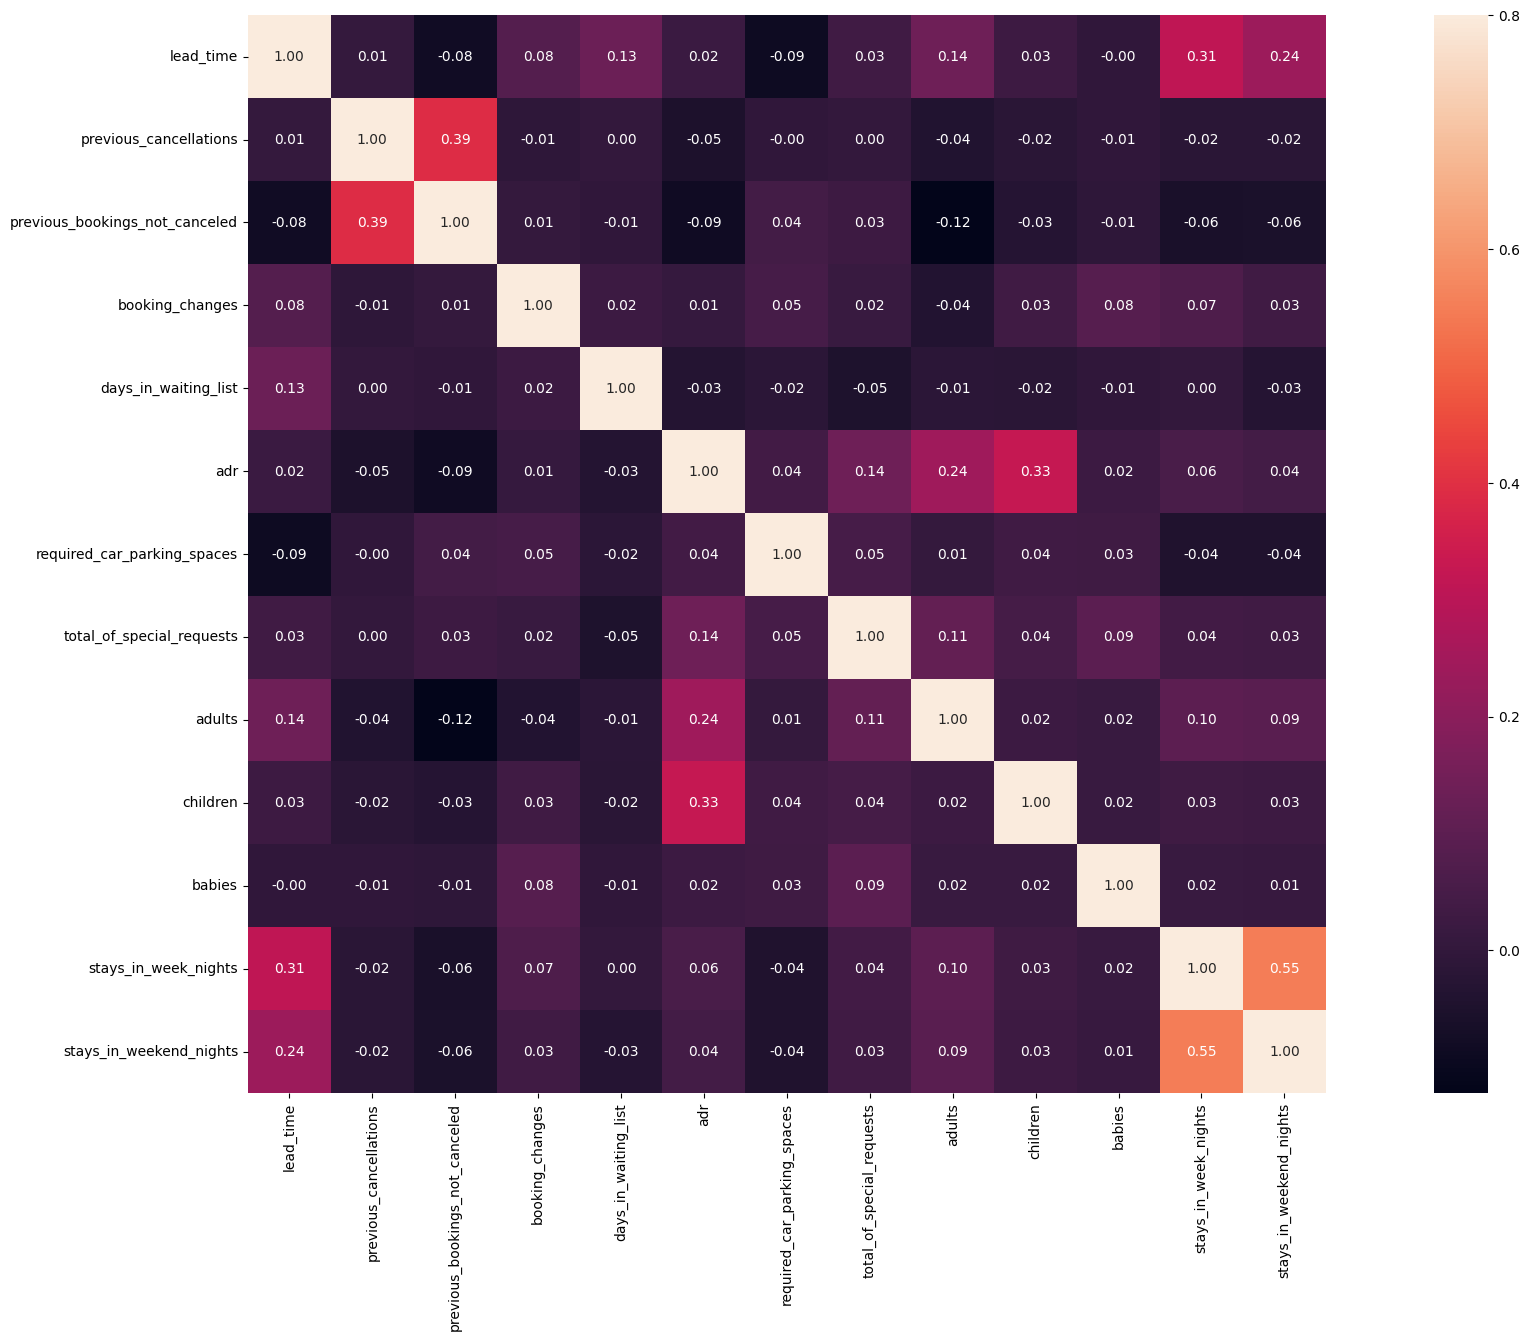

In [ ]:
corrmat = df_corr.corr()

f, ax = plt.subplots(figsize=(28, 14))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

**Total stay length** and **lead time** have slight **correlation**. This may means that for **longer hotel stays** people generally plan **little before** the the actual arrival.

# **Data Analysis**  



Now, we will try to **analyze** this dataset from various aspects of the given attributes :

1) Hotel wise  \
2) Hotel cancellation   \
3) Agents with booking numbers  \
4) Room type in demand  \
5) Preffered meal type   \
6) Duration of stay   \
7) Country Wise Analysis\
8) ADR across each month\
9)Which distribution channel contributed more to adr in order to increase the the income.?\
10)What is the percentage distribution of required_car_parking_spaces?


# 1) Hotel Wise Analysis

In [ ]:
prefered_hotel=df1['hotel'].value_counts()
prefered_hotel

City Hotel      53274
Resort Hotel    33956
Name: hotel, dtype: int64

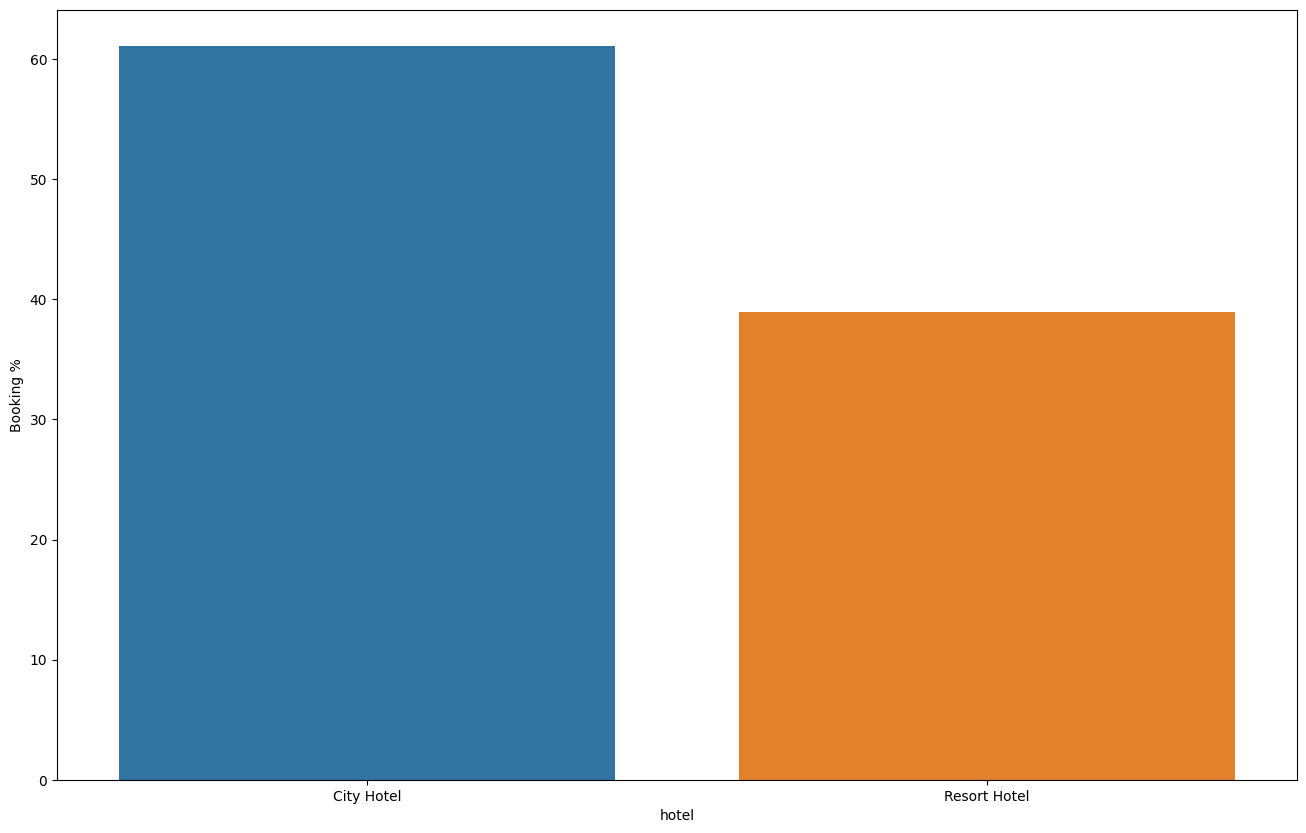

In [ ]:
# We can also find the percentage of more bookings by hotel types

grouped_by_hotel = df1.groupby('hotel')
df_hotel_booking_perecentage = pd.DataFrame((grouped_by_hotel.size()/df1.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})

plt.figure(figsize = (16,10))
sns.barplot(x = df_hotel_booking_perecentage['hotel'], y = df_hotel_booking_perecentage['Booking %'] )
plt.show()

We can see people are booking **city hotels** more than **Resort hotels**. Around **60% bookings** are for City hotel and **40% bookings** are for Resort hotel.
Now we want to know in which **month** people book the hotel.

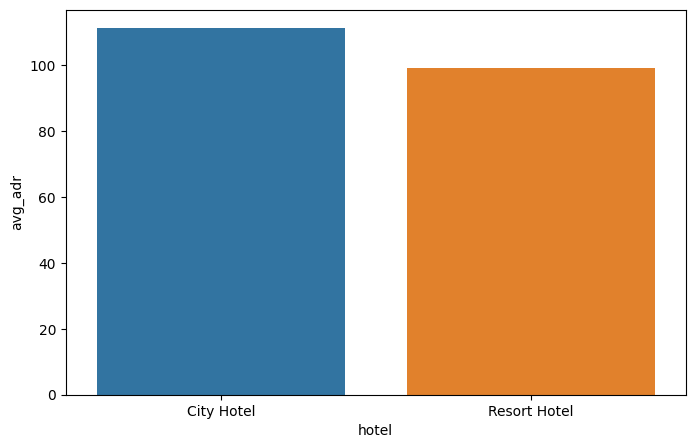

In [ ]:
# Checking which type of hotel is giving more revenues

df_hotel_revenue = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = df_hotel_revenue['hotel'], y = df_hotel_revenue['avg_adr'])
plt.show()

Average adr of **Resort hotel** is slightly lower than that of **City hotel**. Hence, **City hotel** seems to be making slightly **more revenue**.

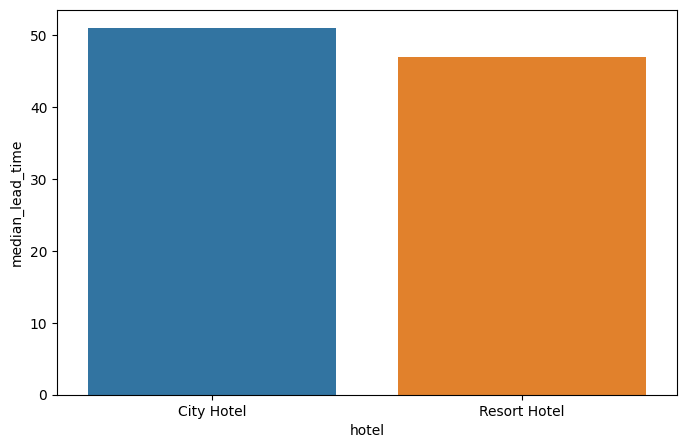

In [ ]:
# Checking for lead time of hotels

df_lead_time = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = df_lead_time['hotel'], y = df_lead_time['median_lead_time'] )
plt.show()

**City hotel** has slightly higher **median** lead time. Also median lead time is significantly higher in each case, this means **customers** generally plan their hotel visits much earlier.

In [ ]:
# Checking for the months having higher hotel bookings

df1['arrival_date_month'].value_counts()


August       11242
July         10043
May           8344
April         7900
June          7756
March         7489
October       6921
September     6682
February      6083
December      5112
November      4973
January       4685
Name: arrival_date_month, dtype: int64

We can clearly see here that most number of people have booked the hotel in the month of **August**.


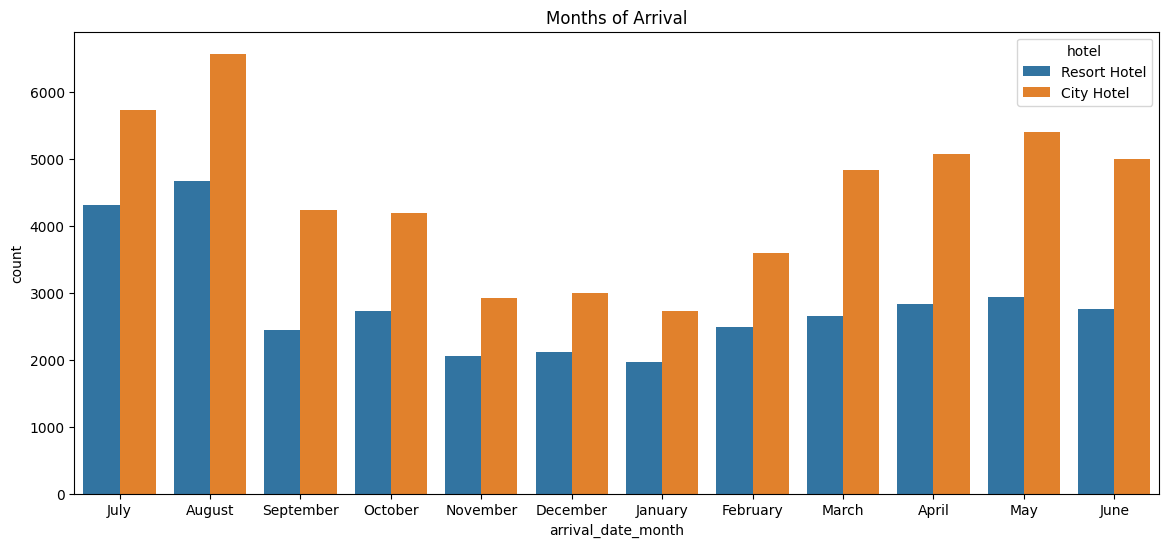

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(x='arrival_date_month', hue = 'hotel', data= df1)
plt.title('Months of Arrival')
plt.show()


Now we will find the **year** in which people booked the **hotel** most.

In [ ]:
df1['arrival_date_year'].value_counts()


2016    42313
2017    31633
2015    13284
Name: arrival_date_year, dtype: int64

From here We can clearly say that in **2016** there was **highest bookings**.

We can also visualize this, **number of bookings by year**

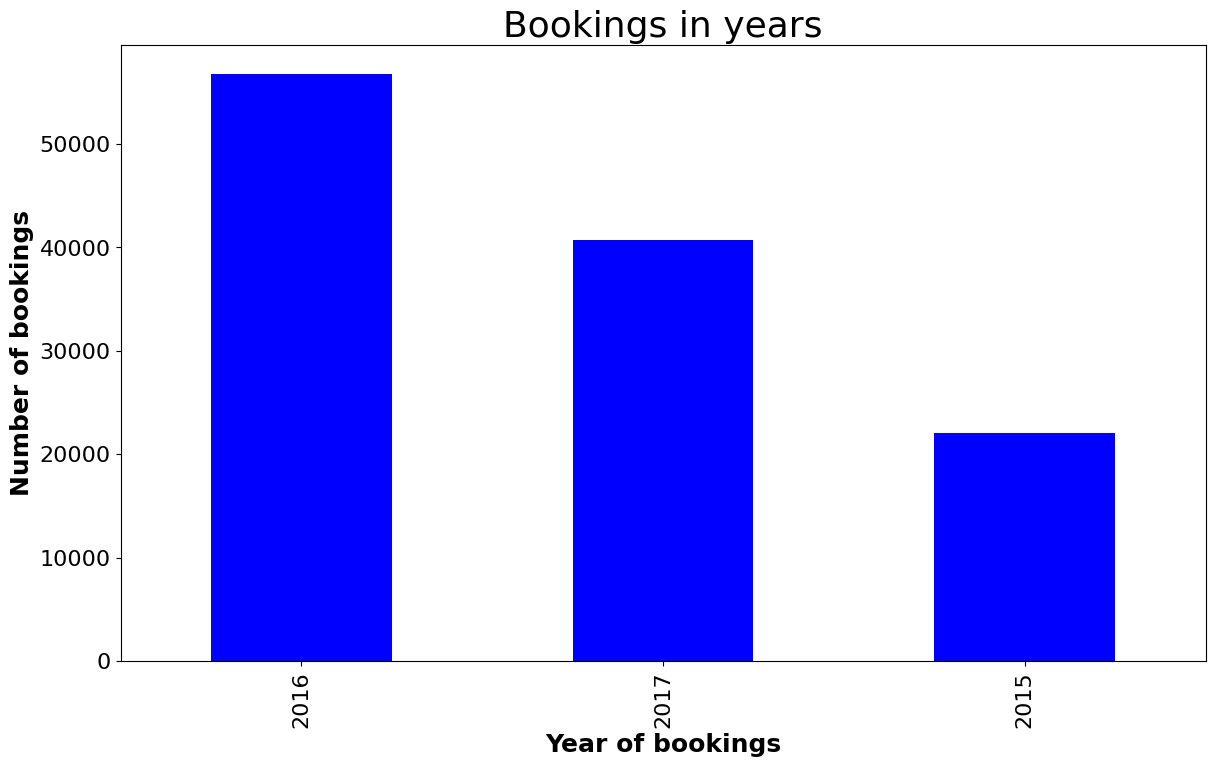

In [ ]:
plt.figure(figsize=(14,8))
df.arrival_date_year.value_counts().plot(kind="bar",color='b', fontsize=16)
plt.title('Bookings in years', fontsize=26)
plt.xlabel('Year of bookings', fontsize=18, fontweight='bold')
plt.ylabel('Number of bookings', fontsize=18, fontweight='bold')

plt.show()

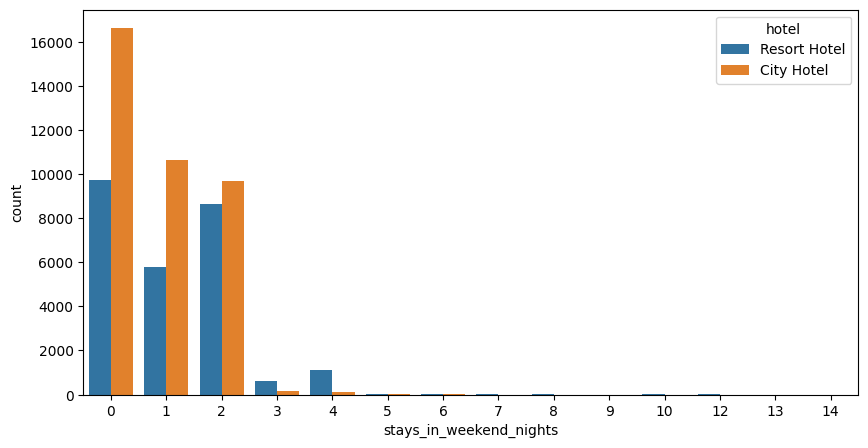

In [ ]:
# Now we will check for the stay lengths in hotels

not_canceled = df1[df1['is_canceled'] == 0]
s1 = not_canceled[not_canceled['stays_in_weekend_nights'] < 15]

plt.figure(figsize = (10,5))
sns.countplot(x = s1['stays_in_weekend_nights'], hue = s1['hotel'])
plt.show()

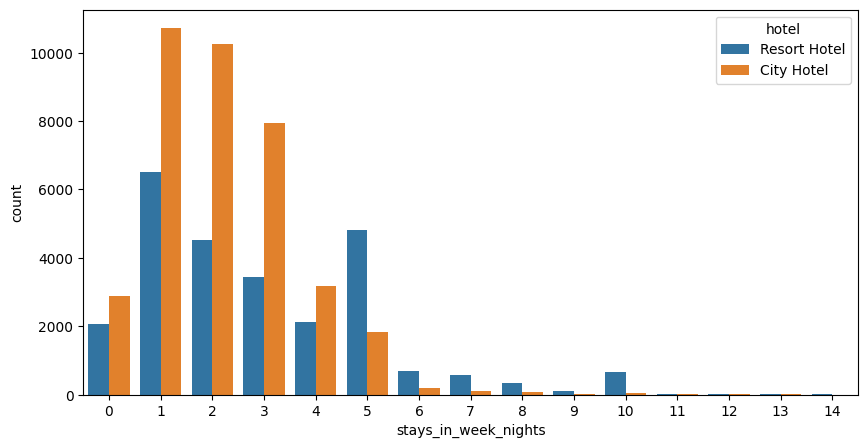

In [ ]:
not_canceled = df1[df1['is_canceled'] == 0]
s2 = not_canceled[not_canceled['stays_in_week_nights'] < 15]

plt.figure(figsize = (10,5))
sns.countplot(x = s2['stays_in_week_nights'], hue = s2['hotel'])
plt.show()

We can see, Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, **Resort Hotel** is preferred.

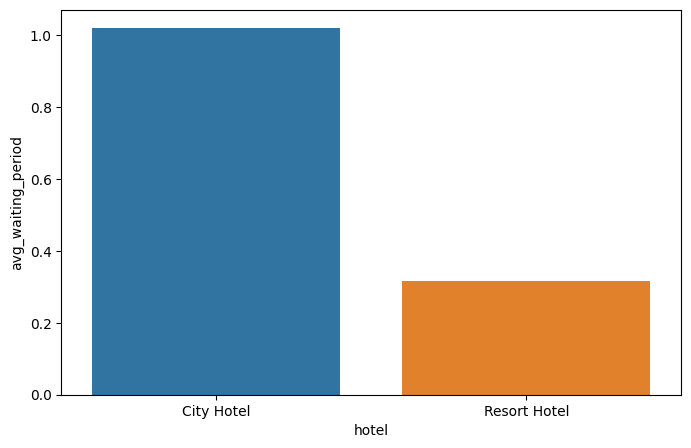

In [ ]:
# Checking which type of hotel has longer waiting tme

longer_waiting_time = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {
    'days_in_waiting_list':'avg_waiting_period'}))

plt.figure(figsize = (8,5))
sns.barplot(x = longer_waiting_time['hotel'], y = longer_waiting_time['avg_waiting_period'] )
plt.show()

We can see **City hotel** has significantly longer **waiting time**, hence City Hotel is much busier than Resort Hotel.

#2)Hotel Cancellation

Now we will check the **cancel** column with **hotel** column and will take out the **cancellation percentage**.

Text(0.5, 1.0, 'Cancellation and Non Cancellation')

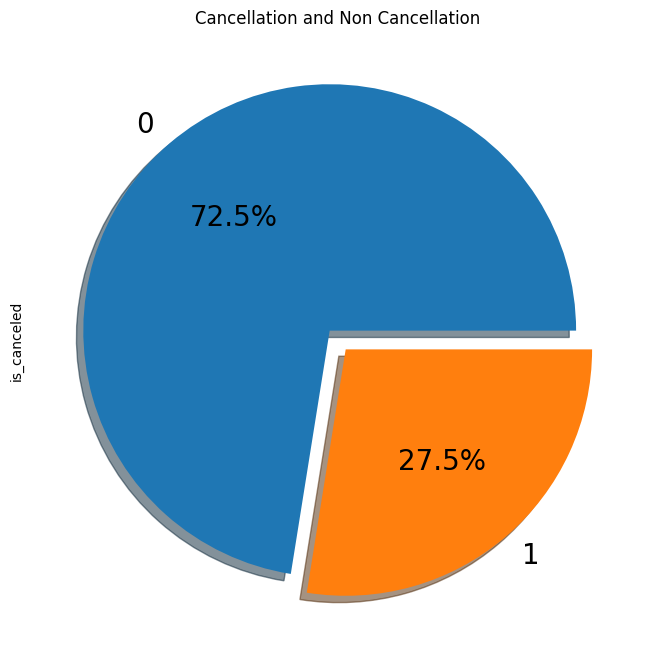

In [ ]:
df1['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title("Cancellation and Non Cancellation")

Clearly index 0 is indicating **City Hotels**, hence we found that **City hotels** have more **cancelled** bookings.

#3) Agents with booking numbers

<Axes: xlabel='agent', ylabel='num_of_bookings'>

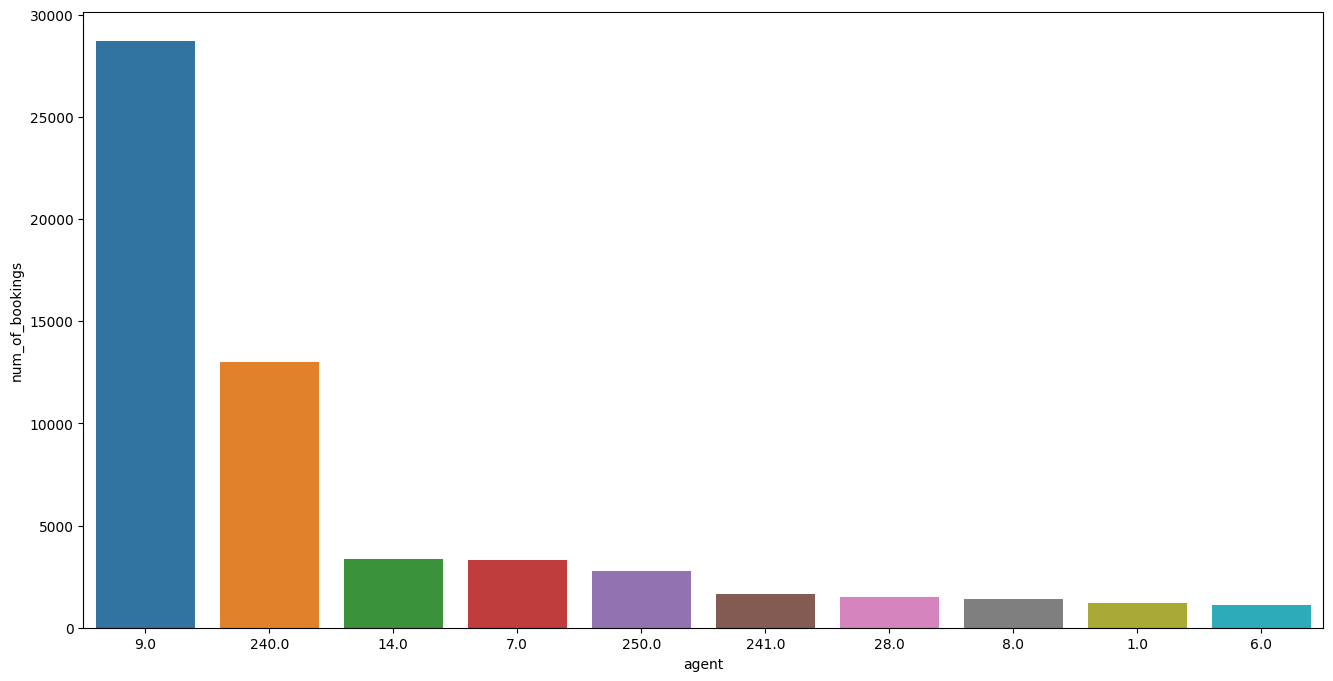

In [ ]:
# Let's start with agent making most no. of bookings

Agent_highest_bookings = pd.DataFrame(df1['agent'].value_counts()).reset_index().rename(columns =
                                                                    {'index':'agent','agent':'num_of_bookings'}
                                                                     ).sort_values(by = 'num_of_bookings', ascending = False)

Agent_highest_bookings.drop(Agent_highest_bookings[Agent_highest_bookings['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
Agent_highest_bookings = Agent_highest_bookings[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (16,8))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = Agent_highest_bookings, order = Agent_highest_bookings.sort_values('num_of_bookings', ascending = False).agent)

Here we can clearly see that **Agent no. 9** has made most no. of bookings.


#4) Room type in demand


Text(0.5, 1.0, ' Room type in demand')

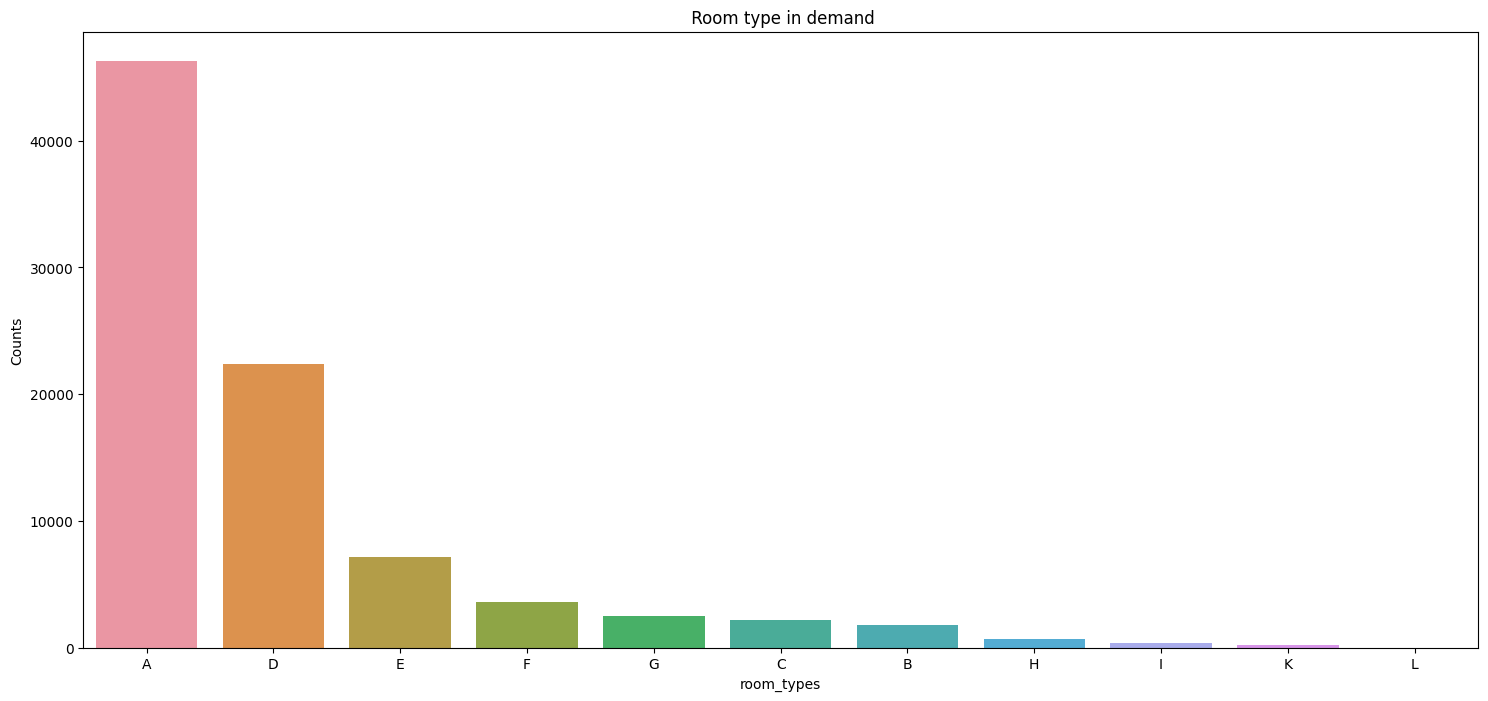

In [ ]:
room_types=df1['assigned_room_type'].value_counts().reset_index().rename(columns={'index': "room_types",'assigned_room_type':'Counts'})
room_types
#Visualizaing the graph

plt.figure(figsize=(18,8))
sns.barplot(x=room_types['room_types'],y=room_types['Counts'])
plt.xlabel('room_types')
plt.ylabel('Counts')
plt.title(" Room type in demand")


Room A is most preffered room

#5) Preffered meal type


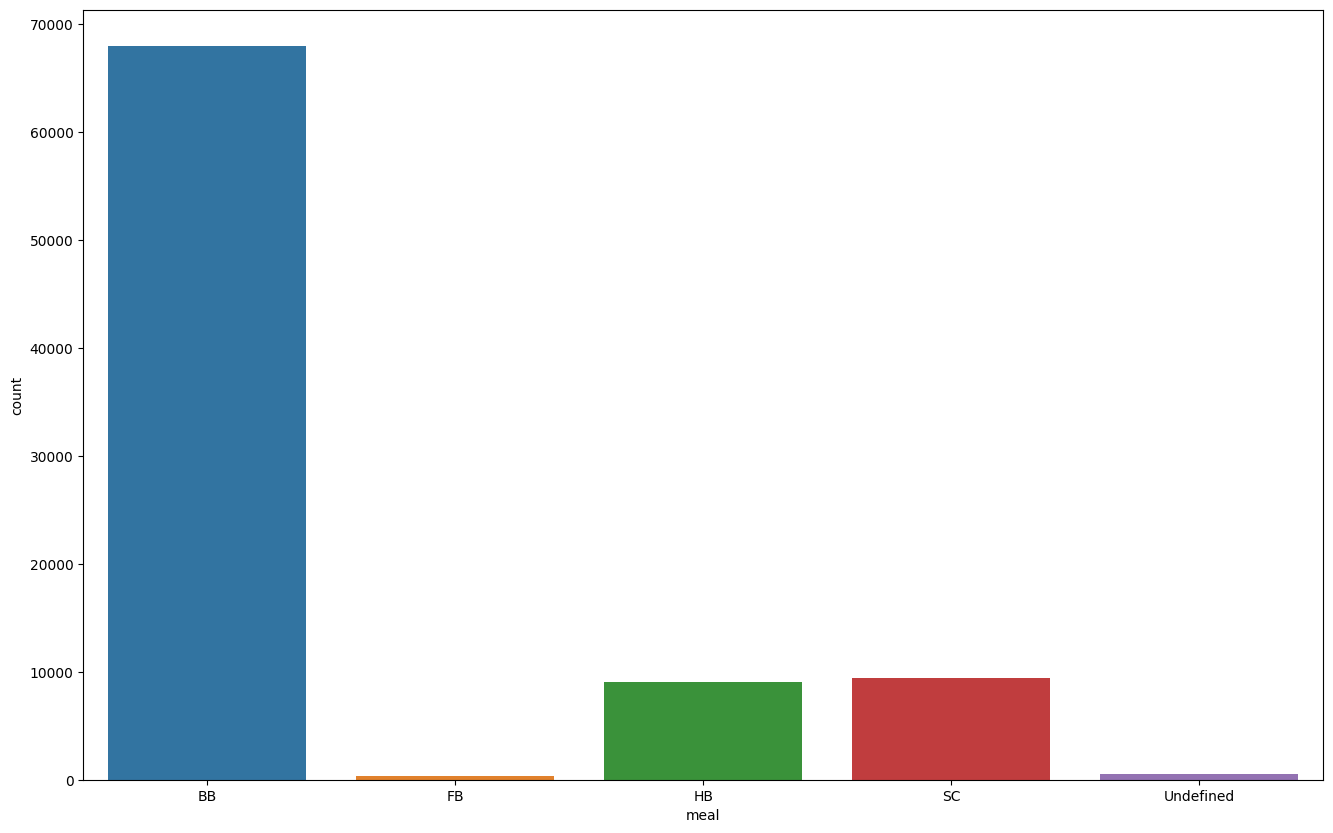

In [ ]:
# Plotting to bar plot to have a view on meal seved to customers

plt.figure( figsize=(16, 10))

sns.countplot(x = df1['meal'])
plt.show()

BB( Bed & Breakfast) is the most preferred  type of meal by the guests.

#6) Duration of stay


In [ ]:
market_segment_df=df1[df1['is_canceled']==1]   # canceled=1
market_segment_df
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by

market_segment_df

,market_segment,hotel,counts
0,Aviation,City Hotel,45
1,Complementary,City Hotel,54
2,Complementary,Resort Hotel,31
3,Corporate,City Hotel,263
4,Corporate,Resort Hotel,246
5,Direct,City Hotel,912
6,Direct,Resort Hotel,825
7,Groups,City Hotel,887
8,Groups,Resort Hotel,445
9,Offline TA/TO,City Hotel,1257


Text(0.5, 1.0, 'Cancellation Rate Vs market_segment')

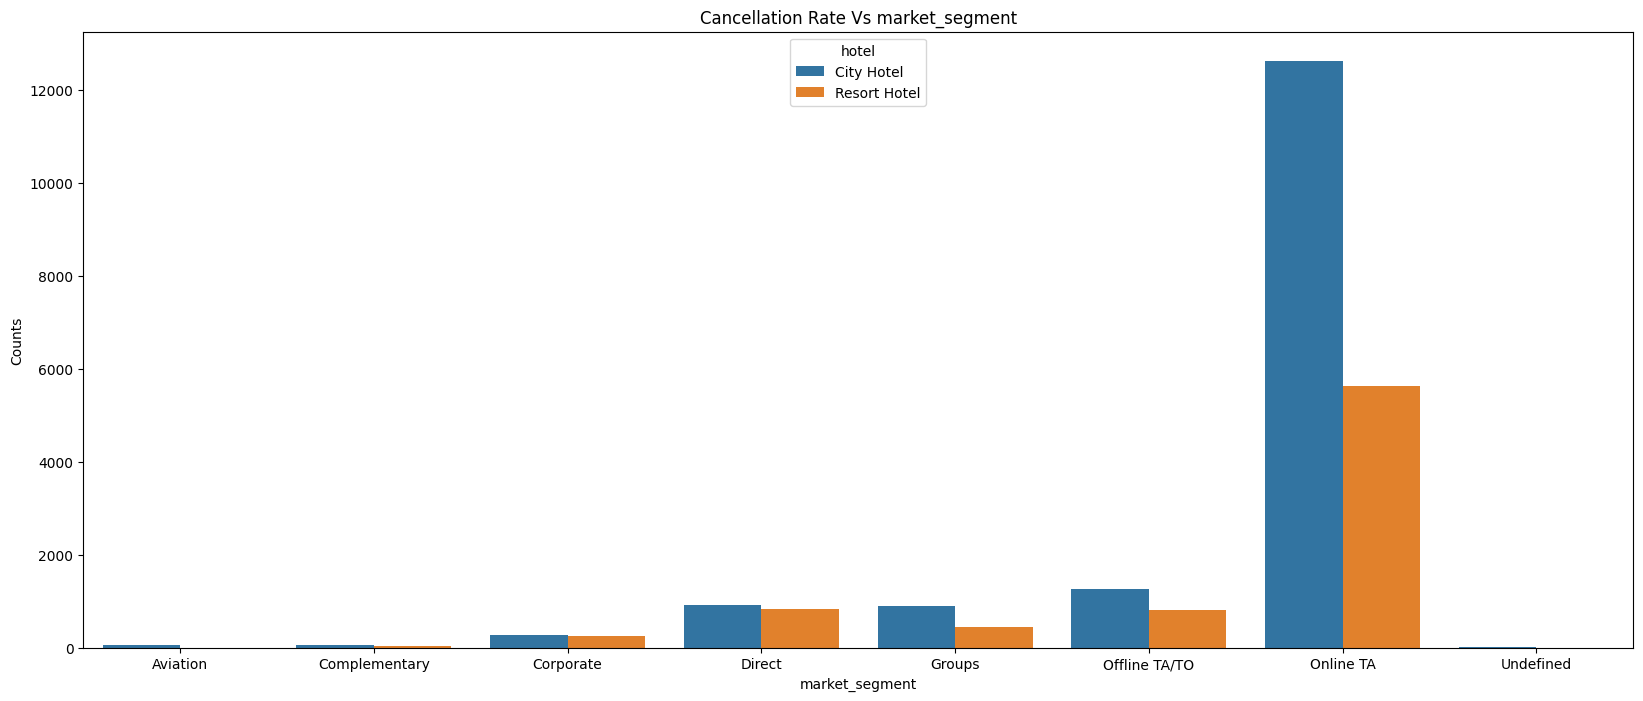

In [ ]:
#set plotsizde and plot barchart
plt.figure(figsize=(20,8))
sns.barplot(x='market_segment',y='counts',hue="hotel",data= market_segment_df)

# set labels
plt.xlabel('market_segment')
plt.ylabel('Counts')
plt.title('Cancellation Rate Vs market_segment')

'Online T/A' has the highest cancellation in both type of cities

In order to reduce the booking cancellations hotels need to set the refundable/ no refundable and deposit policies policies

#7) Country Wise Analysis

In [ ]:
df1['country'].value_counts().head(15)

PRT    27355
GBR    10424
FRA     8823
ESP     7244
DEU     5385
ITA     3061
IRL     3015
BEL     2081
BRA     1993
NLD     1910
USA     1871
CHE     1566
CN      1093
AUT      947
SWE      833
Name: country, dtype: int64

In [ ]:
country_wise_guests = df1[df1['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests.head(15)

,country,No of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
5,IRL,2347
6,ITA,1986
7,BEL,1670
8,NLD,1560
9,USA,1412


In [ ]:
top15 = df1[df1['country'].isin(["PRT","GBR","FRA","ESP","DEU","ITA","IRL","BEL","BRA","NLD","USA","CHE","CN","AUT","SWE"])]

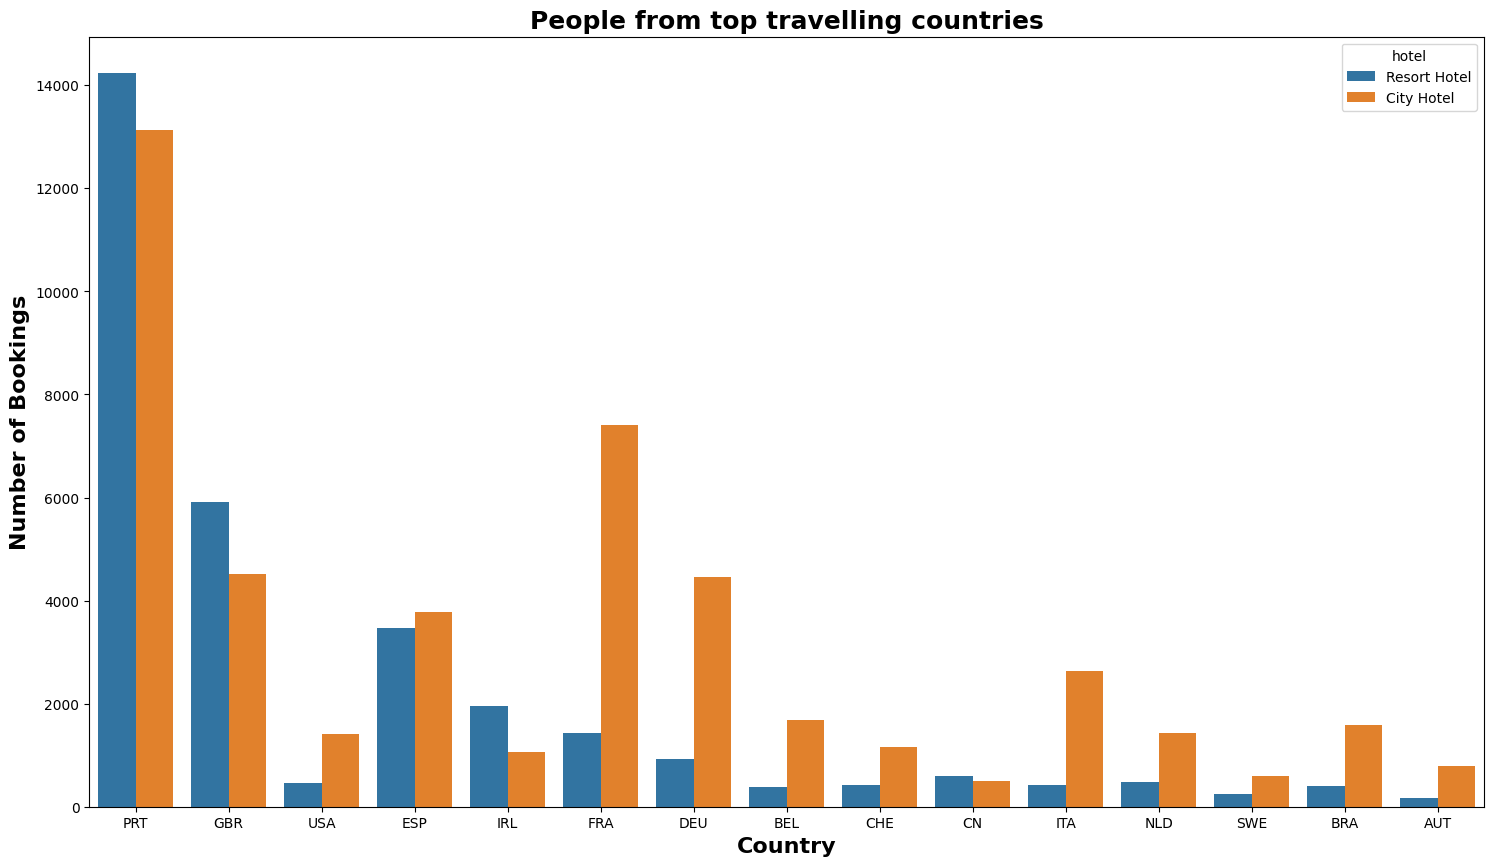

In [ ]:
plt.figure(figsize=(18,10))
sns.countplot(x='country', hue = 'hotel', data = top15)
plt.title('People from top travelling countries', fontsize = 18, fontweight = 'bold')
plt.xlabel('Country', fontsize = 16, fontweight = 'bold')
plt.ylabel('Number of Bookings', fontsize = 16, fontweight = 'bold')
plt.show()

Clearly, The people from top 15 countries chooses **city hotel** over resort hotels. Now we can also make the **map of country location** with counts of the countries.

In [ ]:
# showing on the map

basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

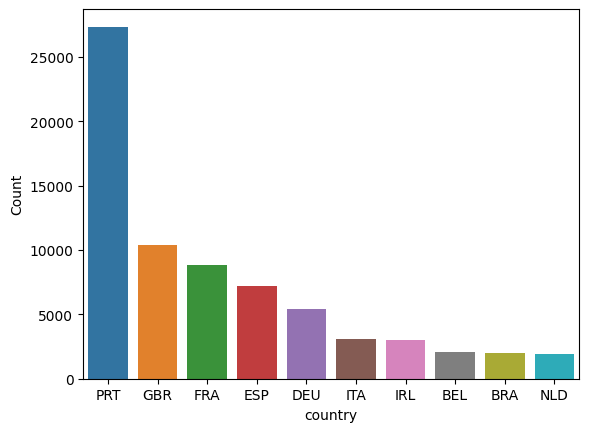

In [ ]:
grouped_by_country = df1.groupby('country')
d1 = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = d1['country'], y  = d1['Count'])
plt.show()

Most of the guests are coming from portugal i.e more 25000 guests are from portugal

1.   PRT- Portugal
2.   GBR- United Kingdom
3.   FRA- France
4.   ESP- Spain
5.   DEU - Germany

#8) ADR across each month

Text(0, 0.5, 'ADR')

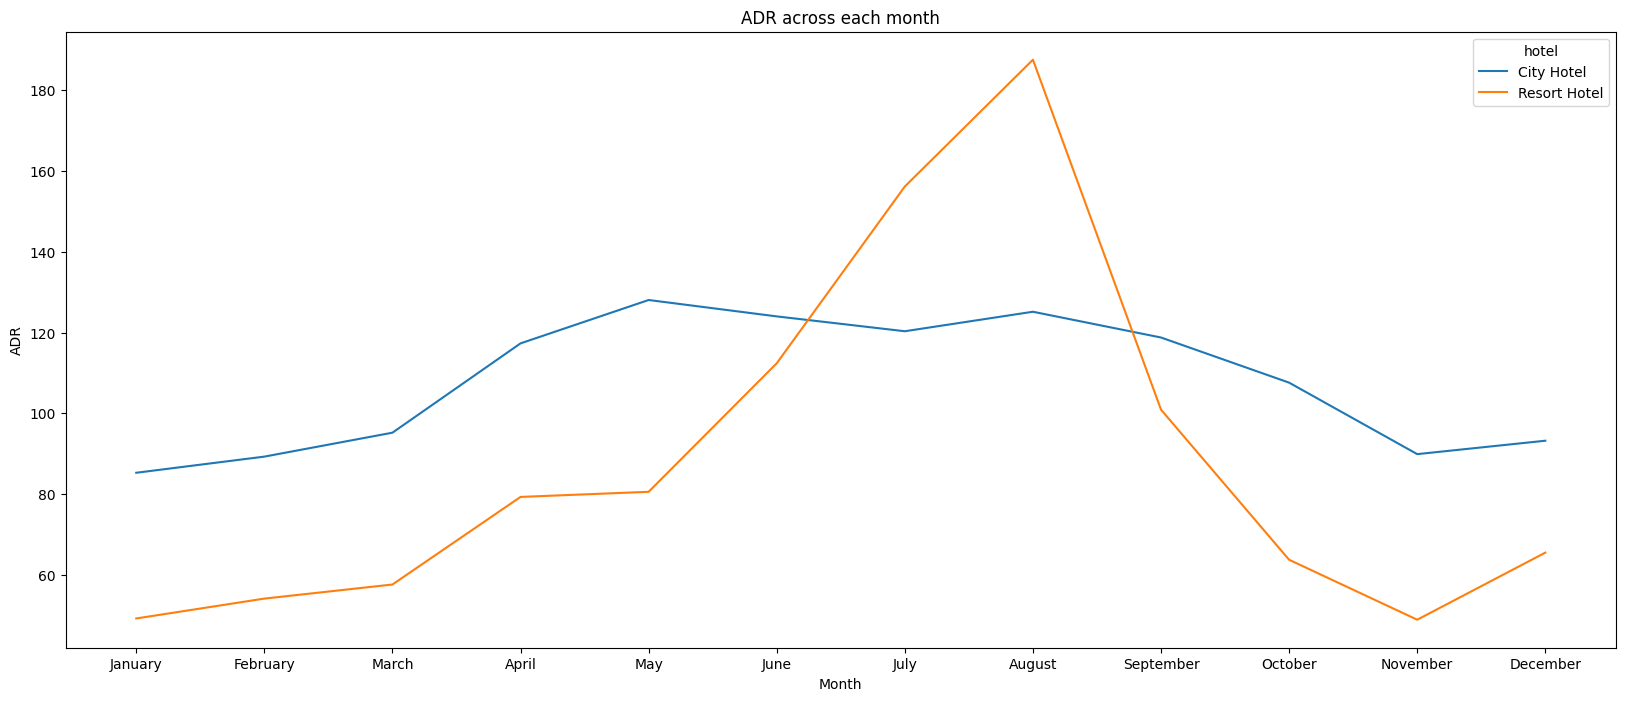

In [ ]:
#groupby
bookings_by_months_df=df1.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
#create month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# it will take the order of the month list in the df along with values
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
#sortting
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')

plt.figure(figsize=(20,8))
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['adr'],hue=bookings_by_months_df['hotel'])

# set lables
plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')

### **Observation**

For Resrot hotel is ADR is high in the months June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the avrage daily rate in this month is very low.

#9)Which distribution channel contributed more to adr in order to increase the the income.?

Text(0.5, 1.0, 'ADR across Distribution channel')

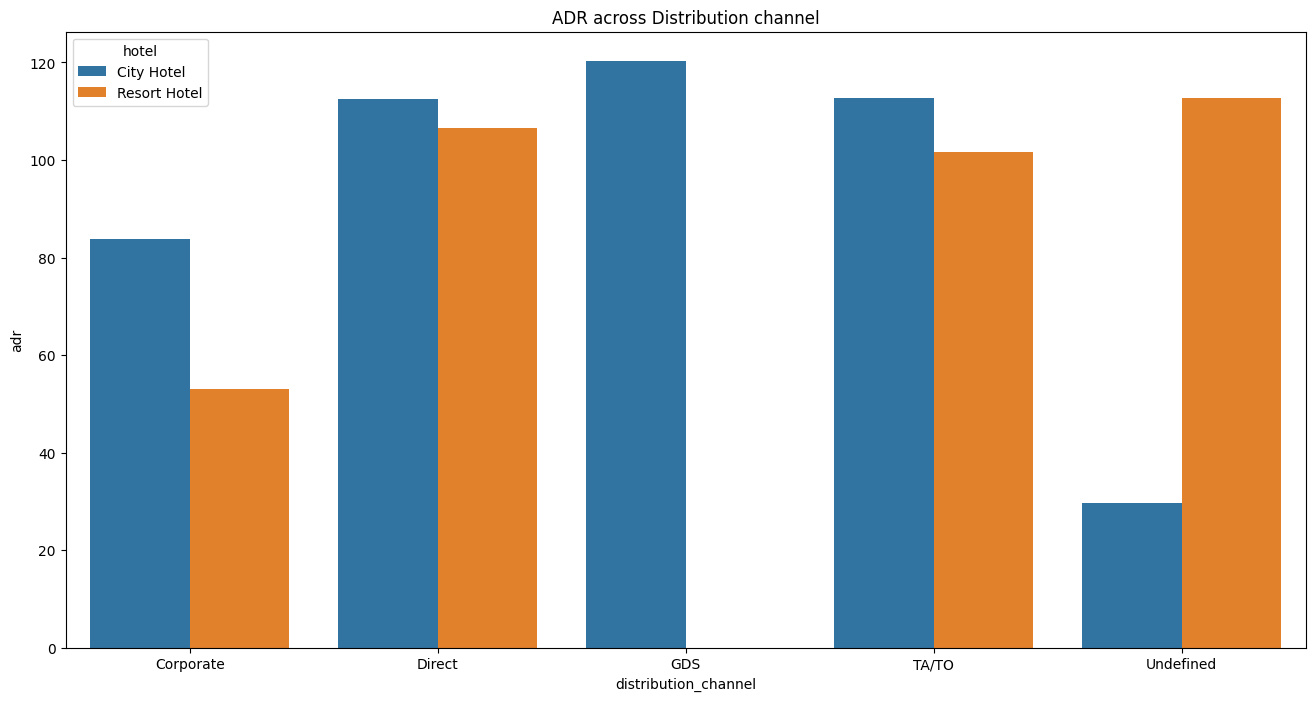

In [ ]:
  # group by distribution channel and hotel
distribution_channel_df=df1.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# set plot size and plot barchart
plt.figure(figsize=(16,8))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel')
plt.title('ADR across Distribution channel')

* Corporate- These are corporate hotel booing companies which makes bookings
possible.
* GDS-A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.
* Direct- means that bookings are directly made with the respective hotels
* TA/TO- means that booings are made through  travel agents or travel operators.
* Undefined- Bookings are undefined. may be customers made their bookings on arrival.

### **Observation**
### From the plot is clear that
### 'Direct' and 'TA/TO' has almost equally contributed in adr in both type of hotels i.e. 'City Hotel' and 'Resort Hotel'.
###  GDS has highly contributed in adr in 'City Hotel' type.
### GDS needs to increase Resort Hotel bookings.

#10)What is the percentage distribution of required_car_parking_spaces?

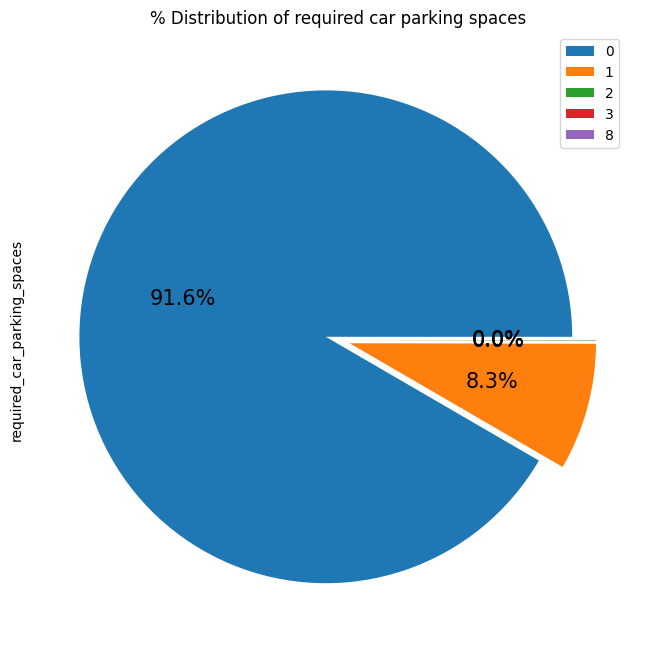

In [ ]:
  df1['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None)

labels=df1['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

City Hotel having 91.6 % parking which is more than resort hotel

# Conclusion

1.We can see people are booking **city hotels** more than **Resort hotels**. Around **60% bookings** are for City hotel and **40% bookings** are for Resort hotel.

Average adr of **Resort hotel** is slightly lower than that of **City hotel**. Hence, **City hotel** seems to be making slightly **more revenue**.

**City hotel** has slightly higher **median** lead time. Also median lead time is significantly higher in each case, this means **customers** generally plan their hotel visits much earlier.

Most number of people have booked the hotel in the month of **August**.

We can clearly see here that most number of people have booked the hotel in the year **2016**.

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, **Resort Hotel** is preferred.

**City hotel** has significantly longer **waiting time**, hence City Hotel is much busier than Resort Hotel.

2.**City hotels** have more **cancelled** bookings.

3.**Agent no. 9** has made most no. of bookings.

4.Room A is most preffered room.

5.BB( Bed & Breakfast) is the most preferred  type of meal by the guests.

6.'Online T/A' has the highest cancellation in both type of cities

In order to reduce the booking cancellations hotels need to set the refundable/ no refundable and deposit policies policies

7.Most of the guests are coming from portugal i.e more 25000 guests are from portugal

1.   PRT- Portugal
2.   GBR- United Kingdom
3.   FRA- France
4.   ESP- Spain
5.   DEU - Germany

8.For Resrot hotel is ADR is high in the months June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the avrage daily rate in this month is very low.

9.Corporate- These are corporate hotel booking companies which makes bookings
possible.
* GDS-A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.
* Direct- means that bookings are directly made with the respective hotels
* TA/TO- means that booings are made through  travel agents or travel operators.
* Undefined- Bookings are undefined. may be customers made their bookings on arrival.

10.City Hotel having 91.6 % parking which is more than resort hotel